# `readLines() 函數`

## 郭耀仁

## 結構單純的網頁

- 可以直接使用內建的 `readLines()` 函數
- 將網頁的 html 檔案讀成一個文字向量
- 然後再使用文字函數與正規表達式解析

## 結構單純的網頁（2）

- [The One Where Monica Gets a New Roommate](http://livesinabox.com/friends/season1/101pilot.htm)

In [1]:
library(magrittr)

fs_s1e1 <- readLines("http://livesinabox.com/friends/season1/101pilot.htm")
head(fs_s1e1)

[1] "<html>"                                                                              
[2] ""                                                                                    
[3] "<head>"                                                                              
[4] "<title>The One Where Monica Gets a New Roomate (The Pilot-The Uncut Version)</title>"
[5] "</head>"                                                                             
[6] ""

## 結構單純的網頁（3）

- 我們想要分析在第一季第一集中，每個角色有幾段台詞
- 觀察一下這個網頁內容，每段台詞前面都會有角色名

In [2]:
character_pattern <- "Joey:|Monica:|Ross:|Rachel:|Chandler:|Phoebe:"
found_character <- grepl(pattern = character_pattern, fs_s1e1)
fs_s1e1[found_character] %>%
    head()

[1] "<p align=\"left\"><font size=\"3\"><b>Monica:</b> There's nothing to tell! He's just some guy" 
[2] "<p align=\"left\"><font size=\"3\"><b>Joey:</b> C'mon, you're going out with the guy! There's" 
[3] "<p align=\"left\"><font size=\"3\"><b>Chandler:</b> <font color=\"#0000FF\">All right Joey, be"
[4] "<p align=\"left\"><font size=\"3\"><b>Phoebe:</b> Wait, does he eat chalk?</font></p>"         
[5] "<p align=\"left\"><font size=\"3\"><b>Phoebe:</b> Just, 'cause, I don't want her to go through"
[6] "<p align=\"left\"><font size=\"3\"><b>Monica:</b> Okay, everybody relax. This is not even a"

## 結構單純的網頁（4）

- 接著我們應該要清理前後的標籤 `<p></p>`、`<b></b>`、`<strong></strong>`

In [3]:
fs_s1e1[found_character] %>%
    gsub(pattern = "<p(>|.*)(<b>|<strong>)", replacement = "") %>%
    gsub(pattern = "(</b>|</strong>).*", replacement = "") %>%
    head()

[1] "Monica:"   "Joey:"     "Chandler:" "Phoebe:"   "Phoebe:"   "Monica:"

## 結構單純的網頁（5）

- 接著我們清理冒號或多餘的空格

In [4]:
fs_s1e1[found_character] %>%
    gsub(pattern = "<p(>|.*)(<b>|<strong>)", replacement = "") %>%
    gsub(pattern = "(</b>|</strong>).*", replacement = "") %>%
    gsub(pattern = "(:\\s)|:", replacement = "") %>%
    head()

[1] "Monica"   "Joey"     "Chandler" "Phoebe"   "Phoebe"   "Monica"

## 結構單純的網頁（6）

- 最後我們利用長條圖（barplot）統計每個角色在第一季第一集說了幾段台詞

In [5]:
table_result <- fs_s1e1[found_character] %>%
    gsub(pattern = "<p(>|.*)(<b>|<strong>)", replacement = "") %>%
    gsub(pattern = "(</b>|</strong>).*", replacement = "") %>%
    gsub(pattern = "(:\\s)|:", replacement = "") %>%
    table()
sort(table_result, decreasing = TRUE)

.
         Monica          Rachel            Ross            Joey        Chandler 
             72              48              47              41              39 
         Phoebe Ross and Rachel 
             19               1 

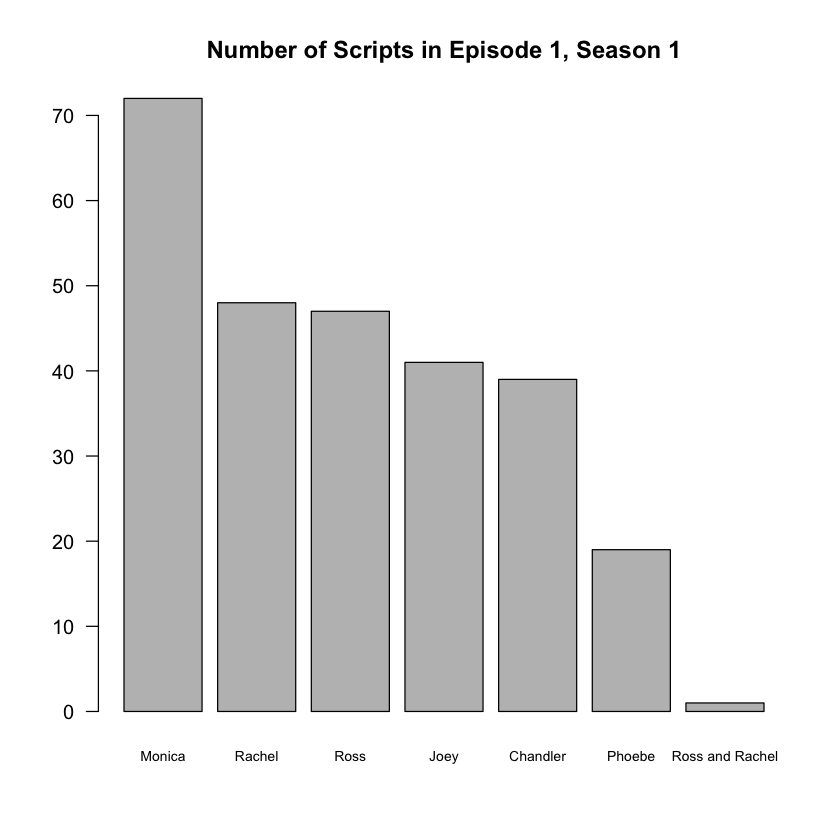

In [6]:
barplot(sort(table_result, decreasing = TRUE), las = 1, cex.names = 0.7, main = "Number of Scripts in Episode 1, Season 1")

## 討論

- `readLines()` 函數只是幫我們把原始網頁檔讀成文字向量而已
- 即便面對結構很簡單的網頁內容，還是很辛苦
- 我們的心聲，[Hadley Wickham](https://github.com/hadley/rvest) 聽到了！

> rvest helps you scrape information from web pages. It is designed to work with [magrittr](https://github.com/tidyverse/magrittr) to make it easy to express common web scraping tasks, inspired by libraries like [beautiful soup](https://www.crummy.com/software/BeautifulSoup/).

> Hadley Wickham